In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

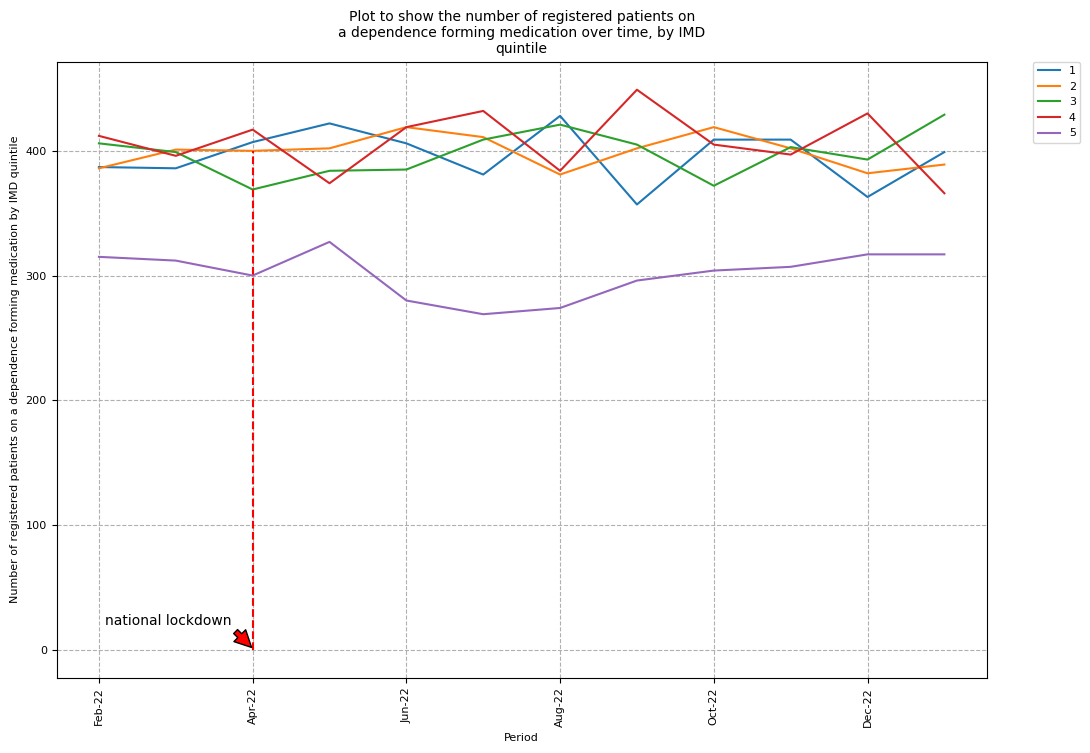

In [2]:
data_measure_dfm_medications_imd_rate = pd.read_csv("../output/measure_dfm_medications_by_imd_q5_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_imd_rate = data_measure_dfm_medications_imd_rate.loc[data_measure_dfm_medications_imd_rate["imd_q5"] != "Unknown", :]
df_measure_dfm_medications_imd_rate = pd.DataFrame.pivot(data_measure_dfm_medications_imd_rate, index='date', columns='imd_q5', values='research_population')
df_measure_dfm_medications_imd_rate.index = pd.to_datetime(df_measure_dfm_medications_imd_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_imd_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [3]:
print(tabulate(df_measure_dfm_medications_imd_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_imd_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      1    2    3    4    5
------  ---  ---  ---  ---  ---
Feb-22  387  386  406  412  315
date      1    2    3    4    5
------  ---  ---  ---  ---  ---
Jan-23  399  389  429  366  317


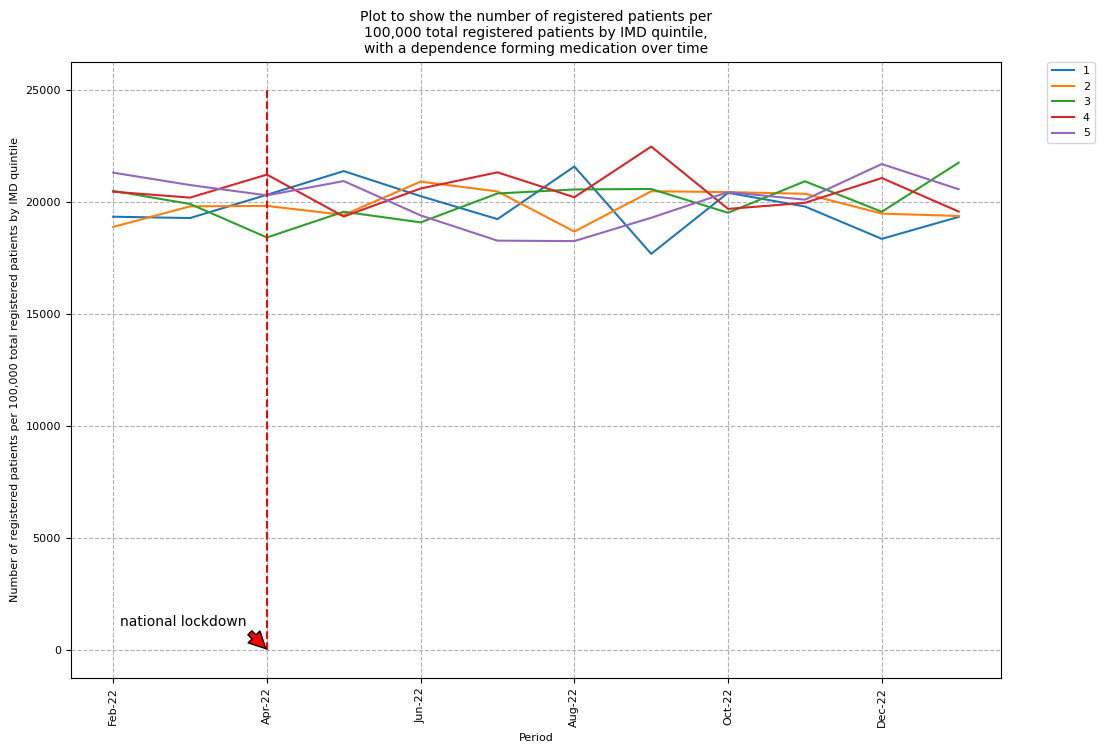

In [4]:
df_temp = pd.DataFrame(data_measure_dfm_medications_imd_rate)
df_imd_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_imd_research_population = pd.DataFrame.pivot(df_imd_research_population, index='date', columns='imd_q5', values='weighted_research_population')
df_imd_research_population.index = pd.to_datetime(df_imd_research_population.index).strftime('%b-%y')
ax = df_imd_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by IMD quintile, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [5]:
print(tabulate(df_imd_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_imd_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date          1        2        3        4        5
------  -------  -------  -------  -------  -------
Feb-22  19330.7  18875.3  20484.4  20446.7  21298.2
date        1        2        3        4        5
------  -----  -------  -------  -------  -------
Jan-23  19322  19362.9  21743.5  19561.7  20557.7


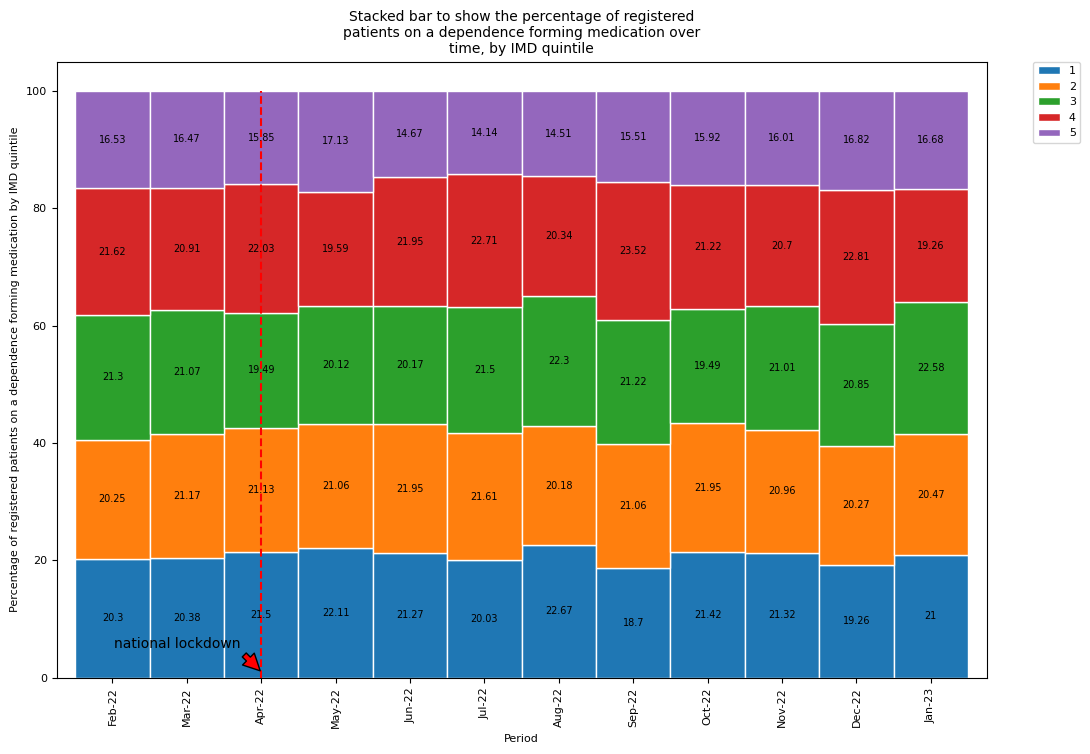

In [6]:
df_imd_stacked = pd.DataFrame(df_measure_dfm_medications_imd_rate)
df_imd_stacked.head()
tot = df_imd_stacked.sum(axis=1)
per = df_imd_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by IMD quintile'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_imd_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()